<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT306 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



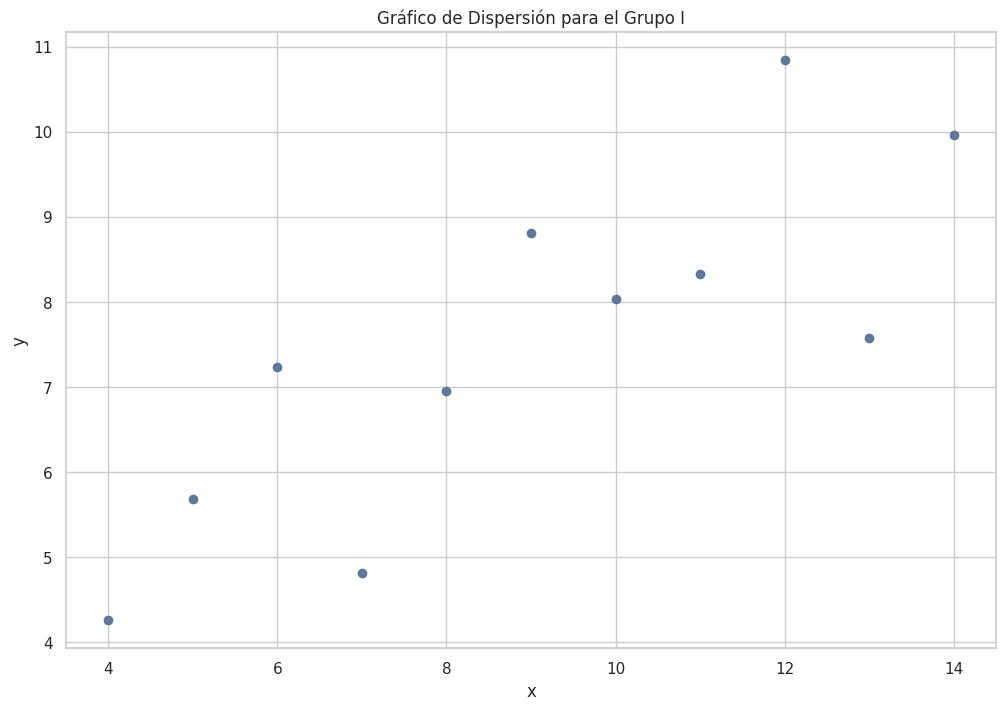

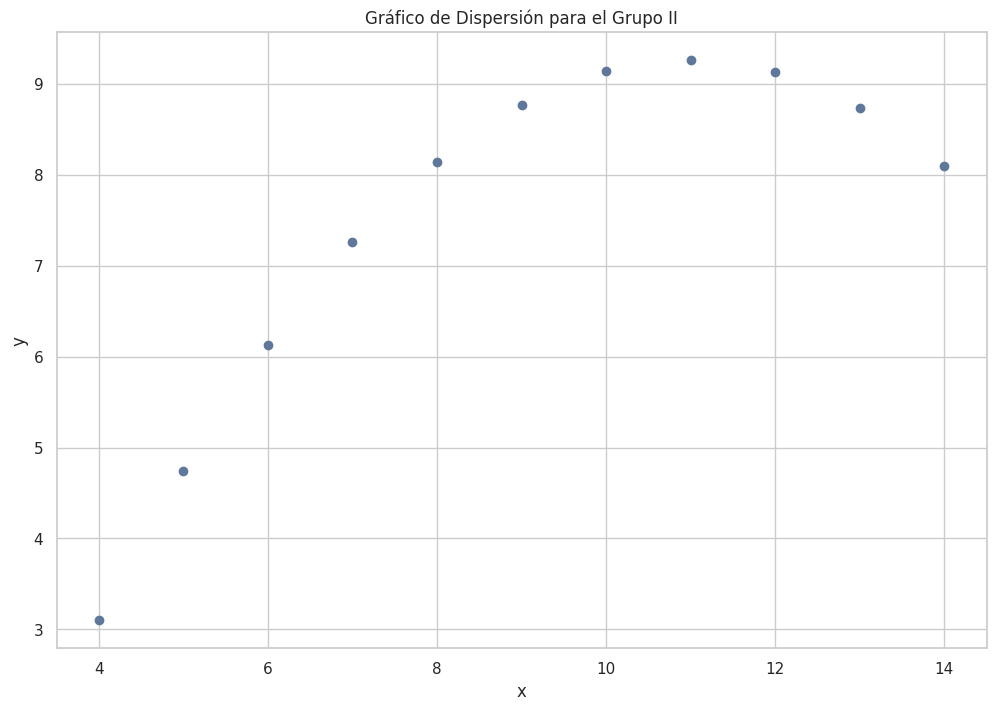

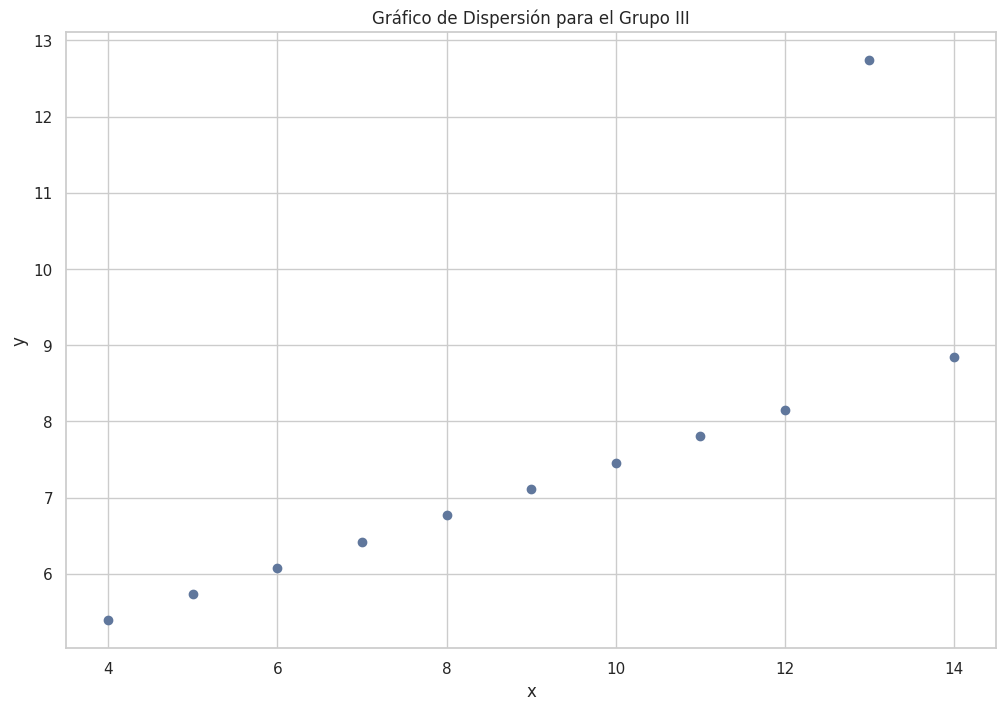

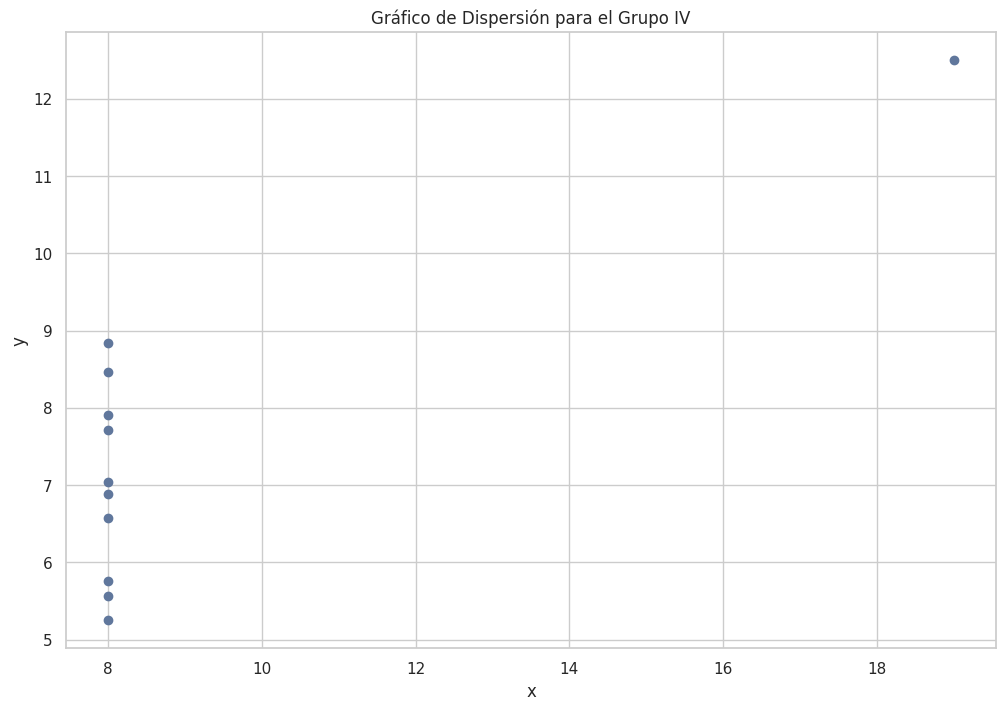

In [4]:
for group in data['dataset'].unique():
    group_data = data[data['dataset'] == group]
    plt.scatter(group_data['x'], group_data['y'], label=group)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Gráfico de Dispersión para el Grupo {group}')
    plt.show()

**R:** La diferencia más grande que podemos presenciar es que cada grupo presenta una distribución distinta en los puntos, lo que puede sugerir un distinto ajuste para cada grupo.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [5]:
descriptive_stats = data.groupby('dataset').describe()
descriptive_stats

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

**R:** Notamos que las estadísticas son parecidas en todos los grupos, variando sólo los percentiles y los valores mínimo y máximo. Esto último puede afectar directamente en la forma de la distribución que siguen los datos.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



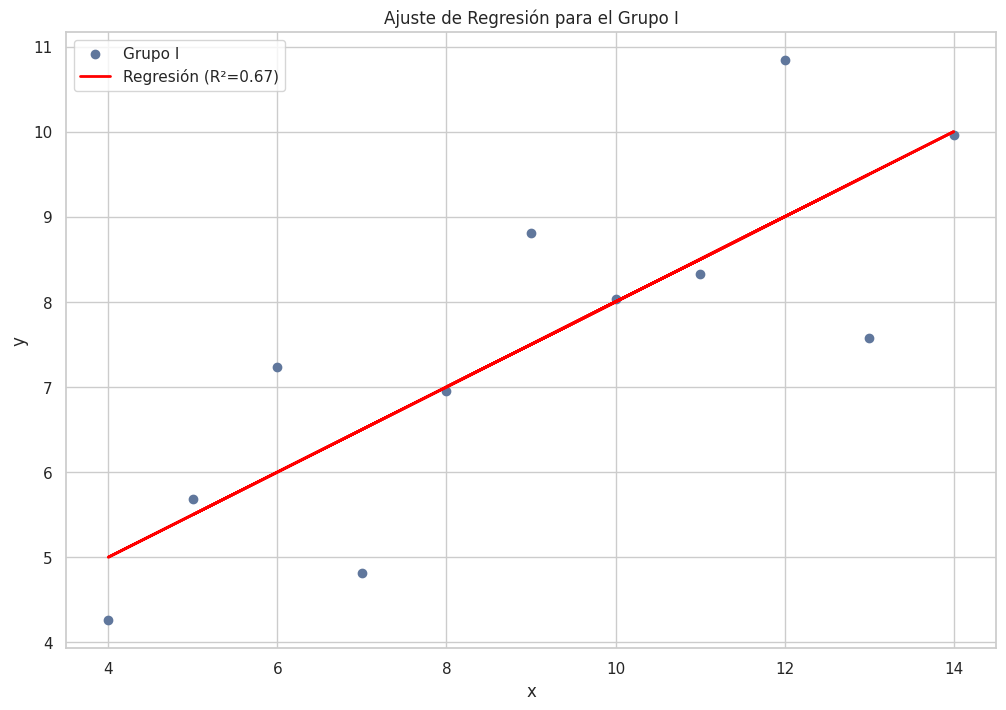

Métricas para el Grupo I:
MSE: 1.2511536363636366
R²: 0.6665424595087748


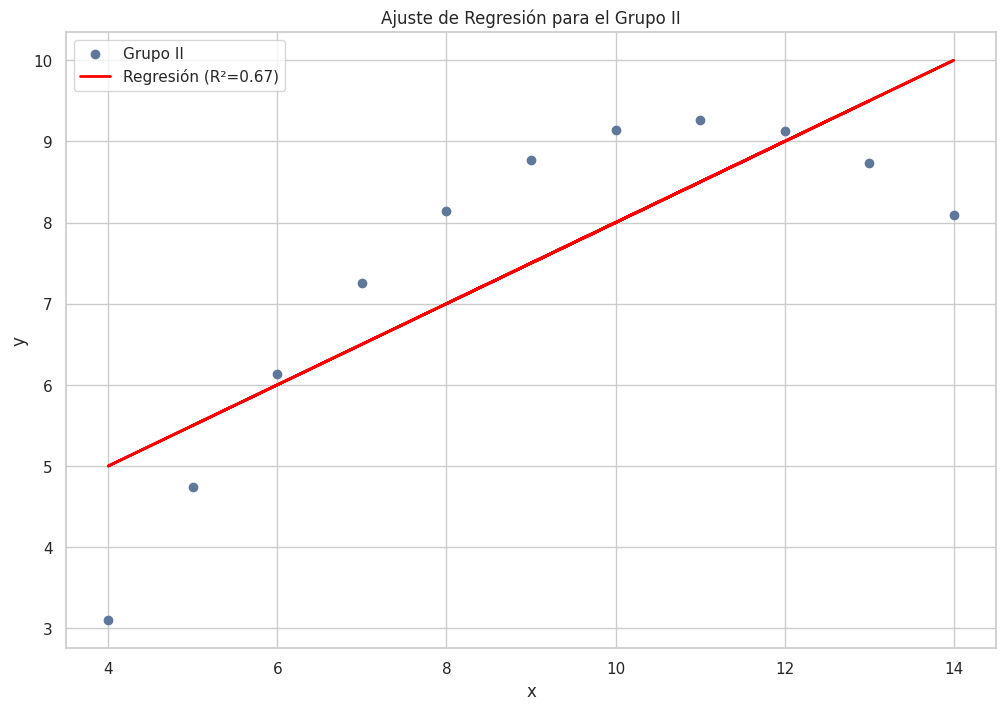

Métricas para el Grupo II:
MSE: 1.2523900826446281
R²: 0.6662420337274844


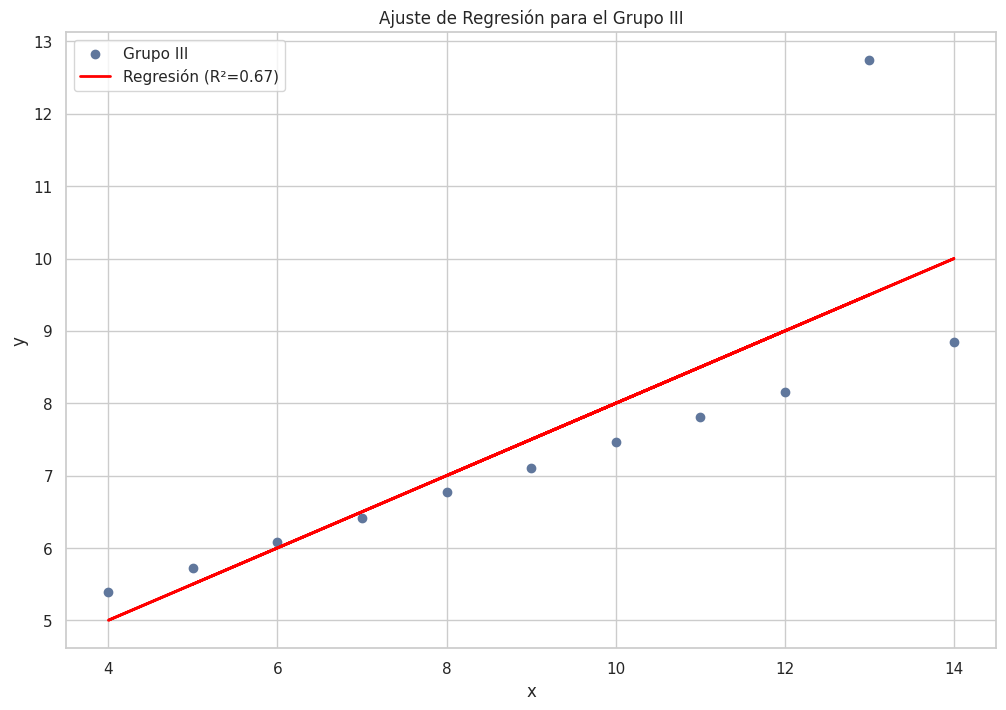

Métricas para el Grupo III:
MSE: 1.2505628925619836
R²: 0.6663240410665592


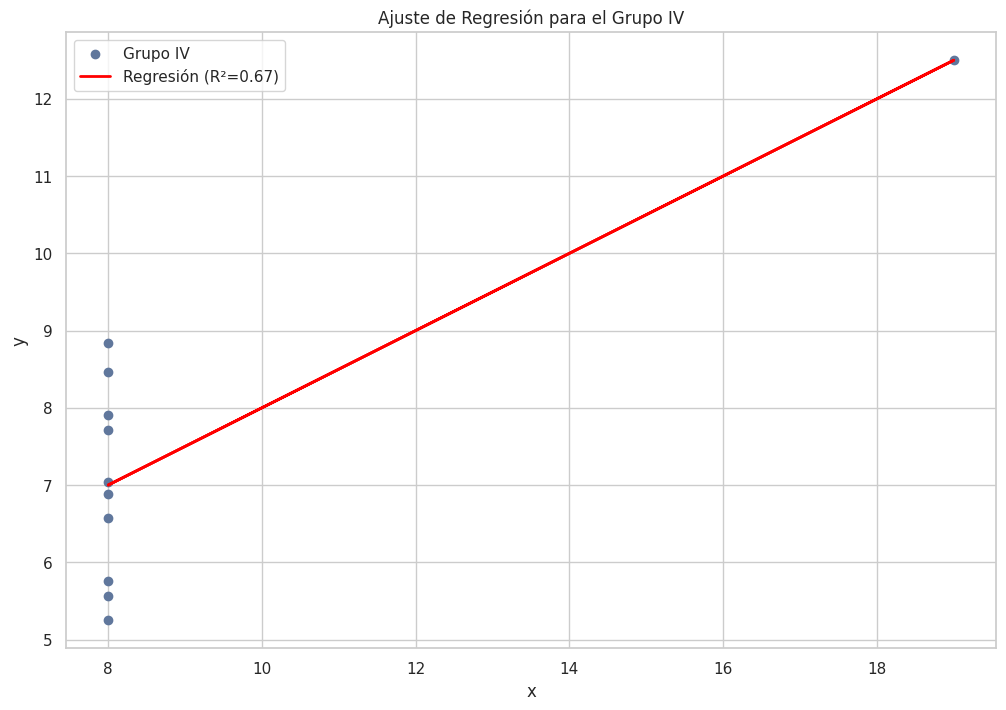

Métricas para el Grupo IV:
MSE: 1.249317272727273
R²: 0.6667072568984653


In [7]:
for group in data['dataset'].unique():
    group_data = data[data['dataset'] == group]
    X = group_data[['x']]
    y = group_data['y']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    plt.scatter(X, y, label=f'Grupo {group}')
    plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regresión (R²={r2:.2f})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Ajuste de Regresión para el Grupo {group}')
    plt.legend()
    plt.show()
    print(f'Métricas para el Grupo {group}:')
    print(f'MSE: {mse}')
    print(f'R²: {r2}')

**R:** Pese a que los errores son parecidos en todos los grupos, es fácil notar que, al menos en el último grupo, una regresión no está capturando correctamente la información que proporcionan los datos.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RANSACRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


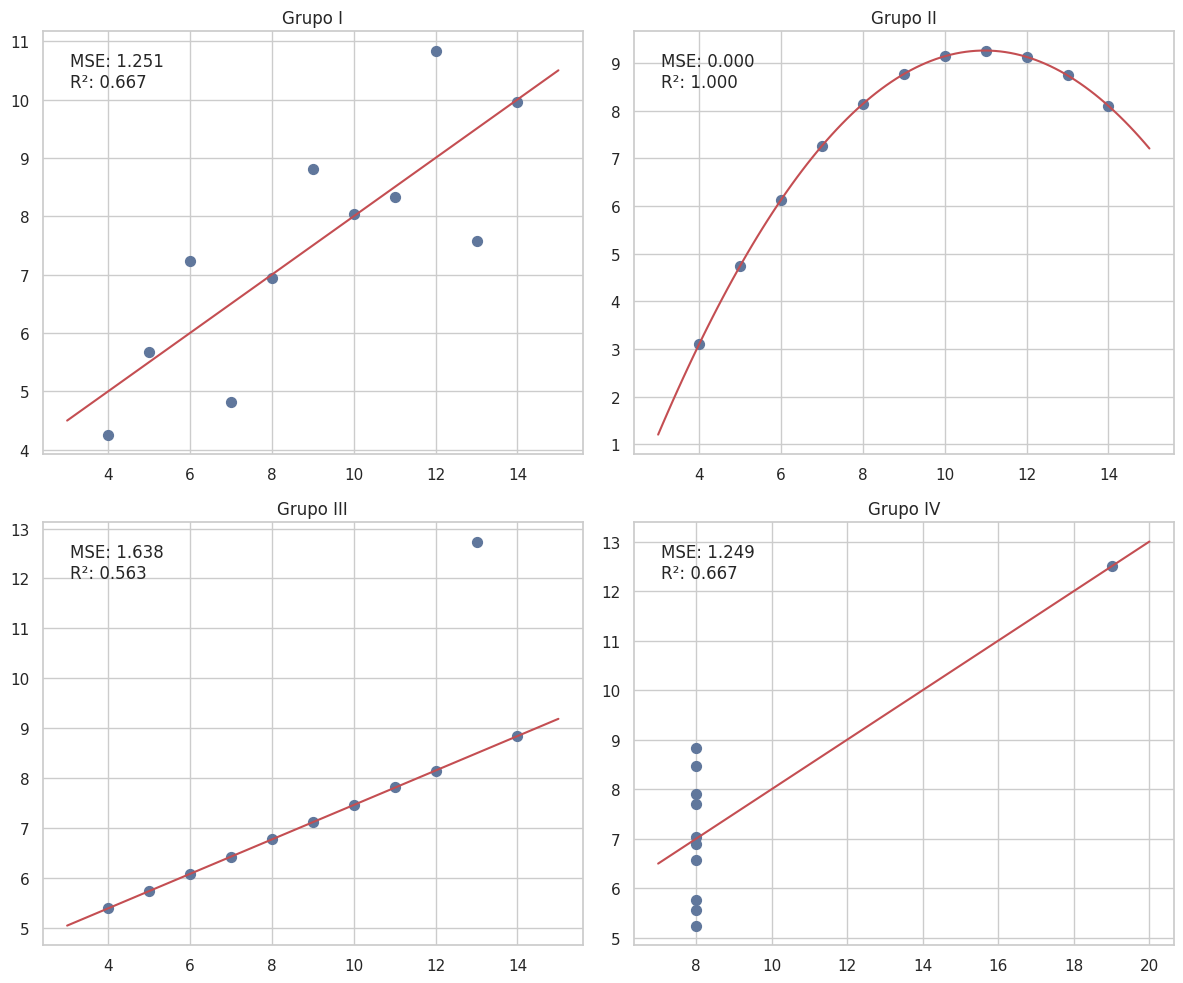

Grupo I: MSE=1.251, R²=0.667
Grupo II: MSE=0.000, R²=1.000
Grupo III: MSE=1.638, R²=0.563
Grupo IV: MSE=1.249, R²=0.667


In [15]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

results = {}
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, dataset in enumerate(data['dataset'].unique()):
    group = data[data['dataset'] == dataset]
    X, y = group[['x']], group['y']

    if dataset == 'I': model = LinearRegression()
    elif dataset == 'II': model = make_pipeline(PolynomialFeatures(2), LinearRegression())
    elif dataset == 'III': model = RANSACRegressor(LinearRegression())
    else: model = LinearRegression()

    model.fit(X, y)
    y_pred = model.predict(X)

    if dataset == 'II':
        slope = model.named_steps['linearregression'].coef_[1]
        intercept = model.named_steps['linearregression'].intercept_
    elif dataset == 'III':
        slope = model.estimator_.coef_[0]
        intercept = model.estimator_.intercept_
    else:
        slope = model.coef_[0]
        intercept = model.intercept_

    results[dataset] = {
        'mse': mean_squared_error(y, y_pred),
        'r2': r2_score(y, y_pred),
        'slope': slope,
        'intercept': intercept
    }

    axes[i].scatter(X, y, s=50)
    x_range = np.linspace(group['x'].min() - 1, group['x'].max() + 1, 100).reshape(-1,1)
    axes[i].plot(x_range, model.predict(x_range), 'r-')
    axes[i].set_title(f'Grupo {dataset}')
    axes[i].text(0.05, 0.95, f'MSE: {results[dataset]["mse"]:.3f}\nR²: {results[dataset]["r2"]:.3f}',
                transform=axes[i].transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

for d in data['dataset'].unique():
    print(f"Grupo {d}: MSE={results[d]['mse']:.3f}, R²={results[d]['r2']:.3f}")

**R:** Para el primer y último grupo hemos dejado un modelo de regresión lineal, pues otra opción para el caso atípico del grupo 4 era considerar la media de los datos pero este método generaba un peor ajuste. Además, para el grupo 2, hemos optado esta vez con un ajuste polinomial, el cual se adapta perfectamente y por último, para el grupo 3 también optamos por una regresión lineal, pero en este caso la ajustamos para que considere el punto atípico como un outlier.